In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [2]:
# Read the dataset into heart_df
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
# first few rows of the dataset
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


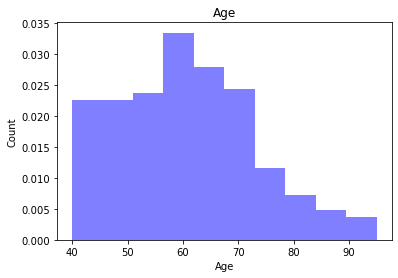

In [4]:
# Histogram of age variable
plt.hist(heart_df.age, 10,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age')
plt.show()

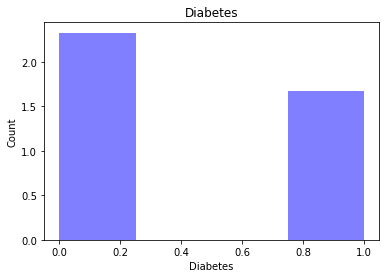

In [5]:
# Histogram of diabetes variable
plt.hist(heart_df.diabetes, 4,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes')
plt.show()

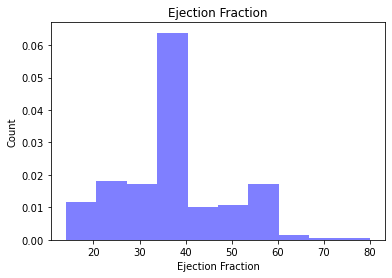

In [6]:
# Histogram of ejection_fraction variable
plt.hist(heart_df.ejection_fraction, 10,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)
plt.xlabel('Ejection Fraction')
plt.ylabel('Count')
plt.title('Ejection Fraction')
plt.show()

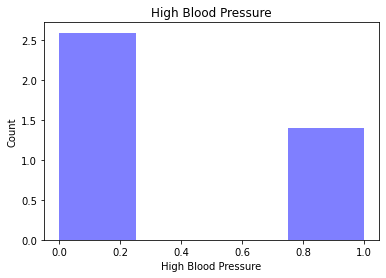

In [7]:
# Histogram of high_blood_pressure variable
plt.hist(heart_df.high_blood_pressure, 4,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)
plt.xlabel('High Blood Pressure')
plt.ylabel('Count')
plt.title('High Blood Pressure')
plt.show()

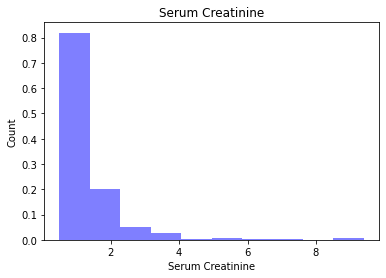

In [8]:
# Histogram of serum_creatinine variable
plt.hist(heart_df.serum_creatinine, 10,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)
plt.xlabel('Serum Creatinine')
plt.ylabel('Count')
plt.title('Serum Creatinine')
plt.show()

In [9]:
np.mean(heart_df.age)

60.83389297658862

In [10]:
stats.mode(heart_df.age)

ModeResult(mode=array([60.]), count=array([33]))

In [11]:
np.median(heart_df.age)

60.0

In [12]:
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [13]:
outliers = detect_outlier(heart_df.age)
outliers

[]

In [14]:
np.mean(heart_df.ejection_fraction)

38.08361204013378

In [15]:
stats.mode(heart_df.ejection_fraction)

ModeResult(mode=array([35], dtype=int64), count=array([49]))

In [16]:
np.median(heart_df.ejection_fraction)

38.0

In [17]:
outliers = detect_outlier(heart_df.ejection_fraction)
outliers

[80]

In [18]:
np.mean(heart_df.serum_creatinine)

1.393879598662207

In [19]:
stats.mode(heart_df.serum_creatinine)

ModeResult(mode=array([1.]), count=array([50]))

In [20]:
np.median(heart_df.serum_creatinine)

1.1

In [21]:
outliers = detect_outlier(heart_df.serum_creatinine)
outliers

[9.4, 5.8, 6.8, 6.1, 9.0, 5.0]

In [22]:
# Splitting variables diabetes and high_blood_pressure to create probabilty mass functions 
diabetes = heart_df[heart_df['diabetes'] == 1]
no_diabetes = heart_df[heart_df['diabetes'] == 0]

high_bp = heart_df[heart_df['high_blood_pressure'] == 1]
normal_bp = heart_df[heart_df['high_blood_pressure'] == 0]

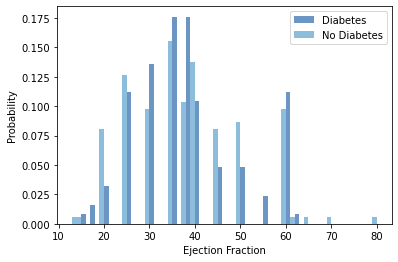

<Figure size 576x432 with 0 Axes>

In [23]:
diab_pmf = thinkstats2.Pmf(diabetes.ejection_fraction)
no_diab_pmf = thinkstats2.Pmf(no_diabetes.ejection_fraction)
width = 1
thinkplot.PrePlot(2)
thinkplot.Hist(diab_pmf, align='left', width=width, label='Diabetes')
thinkplot.Hist(no_diab_pmf, align='right', width=width, label='No Diabetes')
thinkplot.Show(xlabel='Ejection Fraction', ylabel="Probability")

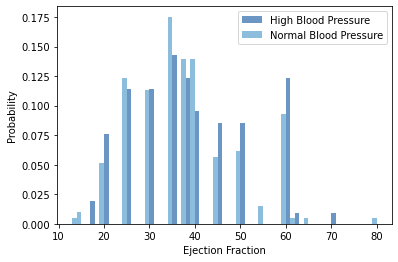

<Figure size 576x432 with 0 Axes>

In [24]:
high_bp_pmf = thinkstats2.Pmf(high_bp.ejection_fraction)
normal_bp_pmf = thinkstats2.Pmf(normal_bp.ejection_fraction)
width = 1
thinkplot.PrePlot(2)
thinkplot.Hist(high_bp_pmf, align='left', width=width, label='High Blood Pressure')
thinkplot.Hist(normal_bp_pmf, align='right', width=width, label='Normal Blood Pressure')
thinkplot.Show(xlabel='Ejection Fraction', ylabel="Probability")

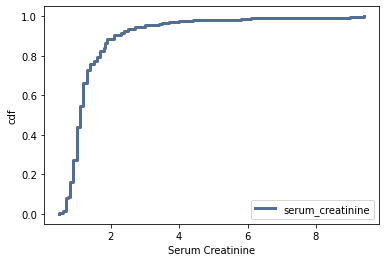

<Figure size 576x432 with 0 Axes>

In [25]:
# Cumulative distribution function for serum_creatinine variable
cdf = thinkstats2.Cdf(heart_df.serum_creatinine, label="serum_creatinine")
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel="Serum Creatinine", ylabel="cdf")

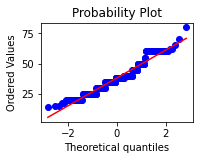

In [26]:
# Normal probability plot for ejection_fraction variable
ax4 = plt.subplot(224)
x = stats.norm.rvs(loc=0, scale=1, size=len(heart_df))
res = stats.probplot(heart_df.ejection_fraction, plot=plt)
plt.show()

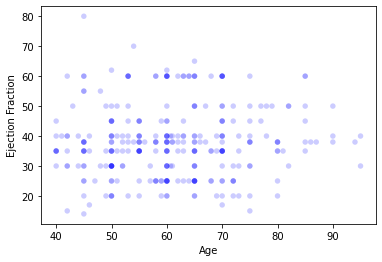

<Figure size 576x432 with 0 Axes>

In [27]:
# scatter plot to show relationship between age variable and ejection_fraction variable
thinkplot.Scatter(heart_df.age, heart_df.ejection_fraction)
thinkplot.Show(xlabel="Age", ylabel="Ejection Fraction")

In [29]:
thinkstats2.Corr(heart_df.age, heart_df.ejection_fraction)

0.060098363232912864

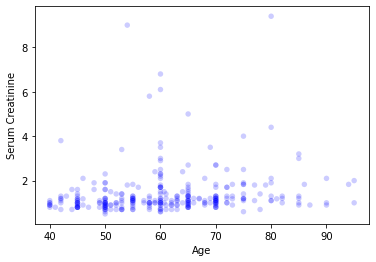

<Figure size 576x432 with 0 Axes>

In [30]:
# scatter plot to show relationship between age variable and serum_creatinine variable
thinkplot.Scatter(heart_df.age, heart_df.serum_creatinine)
thinkplot.Show(xlabel="Age", ylabel="Serum Creatinine")

In [31]:
thinkstats2.Corr(heart_df.age, heart_df.serum_creatinine)

0.15918713328355014

In [32]:
class CorrelationPermute(thinkstats2.HypothesisTest):
    
    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat
    
    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
    

In [33]:
# Hypothesis testing to determine if diabetes can cause death or not

data = heart_df.diabetes, heart_df.DEATH_EVENT
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.914

In [34]:
# logistic regression model for dependent variable DEATH_EVENT, all other variables are independent variables
model = smf.logit('DEATH_EVENT ~ age + diabetes + ejection_fraction + high_blood_pressure + serum_creatinine', data = heart_df)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.505956
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                  0.1939
Time:                        11:31:27   Log-Likelihood:                -151.28
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 2.692e-14
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.6460      0.887     -2.985      0.003      -4.384      -0.908
ag